# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [3]:
#Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [69]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "/map/London_Borough_Excluding_MHW.shp"

def extraer_datos(root, database):
    csv_path=root+database
    return pd.read_csv(csv_path)

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [15]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
df1=extraer_datos(DOWNLOAD_ROOT,LONDON_SALARY)
df2=extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df1.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [17]:
#Filtrar los datos 
df1= df1.filter(items=["median_salary","area","date"])

In [19]:
#Fusionar los dos dataframe
data=pd.merge(df1,df2)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,33020.0,city of london,1999-12-01,169309,E09000001,97.0,NaN,1
1,21480.0,barking and dagenham,1999-12-01,68812,E09000002,267.0,NaN,1
2,19568.0,barnet,1999-12-01,149510,E09000003,619.0,NaN,1
3,18621.0,bexley,1999-12-01,93905,E09000004,460.0,NaN,1
4,18532.0,brent,1999-12-01,123398,E09000005,395.0,NaN,1


In [21]:
# Obtener información de los datos.
"popularion_size","life_satisfaction","number_of_houses"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 56.6+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [23]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

area
city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmi

In [25]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format='{:,.2f}'.format
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


array([[<Axes: title={'center': 'median_salary'}>,
        <Axes: title={'center': 'average_price'}>],
       [<Axes: title={'center': 'houses_sold'}>,
        <Axes: title={'center': 'no_of_crimes'}>],
       [<Axes: title={'center': 'borough_flag'}>, <Axes: >]], dtype=object)

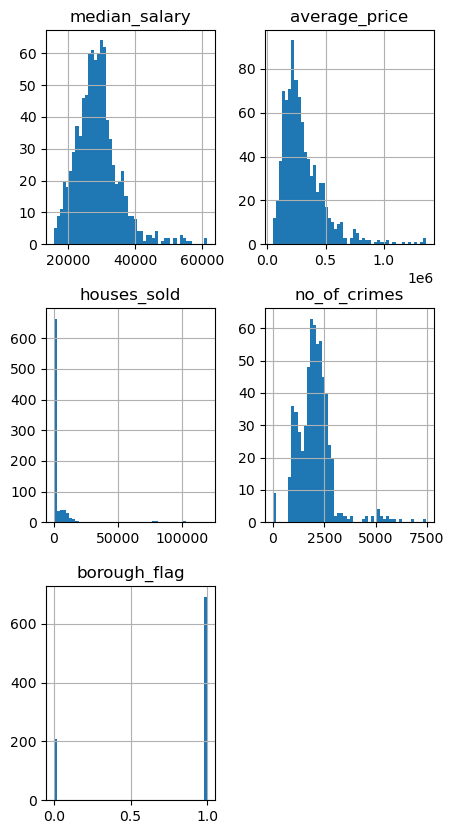

In [27]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
data.hist(bins=50, figsize=(5,10))

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [29]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [31]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent, set_prueba = train_test_split(data, test_size=0.3, random_state=45)


In [33]:
#confirmamos la división
print(len(set_ent),len(set_prueba))

632 271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<Axes: >

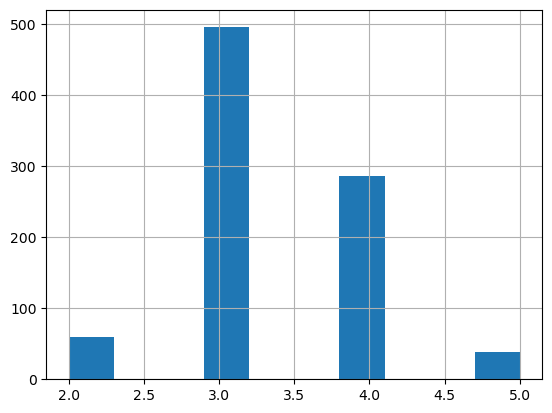

In [35]:
# Para categorizar una variable, ejemplo con 5 niveles. 

data["salary_cat"]=pd.cut(data["median_salary"],bins=[0.,10000, 20000, 30000, 40000, np.inf],labels=[1,2,3,4,5])
#Hacer un histograma de las categorías
#Hacer un histograma de las categorías
data["salary_cat"].hist()

In [37]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

<Axes: >

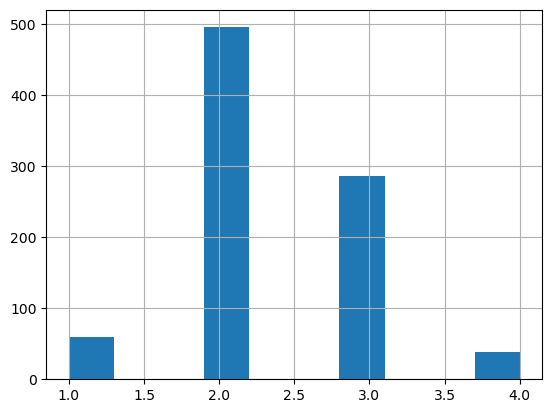

In [39]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data=data.dropna(subset=['median_salary'])
data=data.reset_index()
data['salary_cat']=pd.cut(data["median_salary"], bins=[10000, 20000, 30000, 40000, np.inf],labels=[1,2,3,4])
data['salary_cat'].hist()

In [41]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts()

salary_cat
2    496
3    287
1     59
4     39
Name: count, dtype: int64

In [43]:
## Dividir datos basándonos en nuestras categorías de salarios

from sklearn.model_selection import StratifiedShuffleSplit

In [45]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=45)

In [47]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data, data["salary_cat"]):
    cat_set_ent=data.loc[ent_index]
    cat_set_prueba=data.loc[prueba_index]

In [49]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts()/len(cat_set_prueba)

salary_cat
2   0.56
3   0.32
1   0.07
4   0.05
Name: count, dtype: float64

***

In [337]:
# Creamos dataframe para trabajar con el set de entrenamiento
df=cat_set_ent.copy()
df.head()

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,151841,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,279575,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,223743,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,223141,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,262106,E09000013,255.00,NaN,1,2


***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [71]:
#Importar geopandas
import geopandas as gdp

#Leer el mapa
londres_map = gdp.read_file(LONDON_MAP)
londres_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ..."
1,Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((5.35e+05 1.6e+05, 5.35e+05 1.6e+05, ..."
2,Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((5.4e+05 1.58e+05, 5.4e+05 1.58e+05, ..."
3,Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((5.22e+05 1.78e+05, 5.22e+05 1.78e+05..."
4,Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((5.1e+05 1.83e+05, 5.1e+05 1.83e+05, ..."


<Axes: >

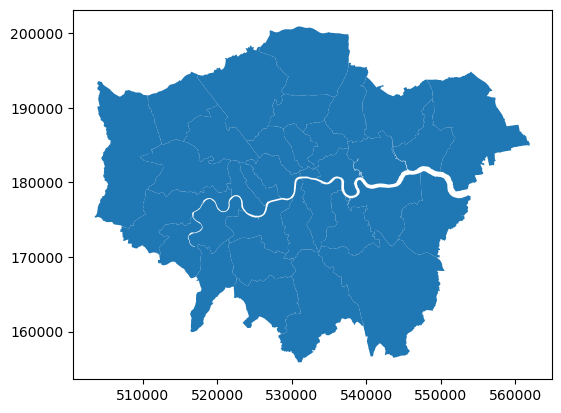

In [73]:
# Graficamos el mapa
londres_map.plot()

***

In [75]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 

londres_map.columns = londres_map.columns.str.lower()
londres_map = londres_map.rename({'name': 'area', 'gss_code': 'code'}, axis=1)
londres_map["area"] = londres_map["area"].str.lower()

#Seleccionar columnas necesarias
londres_map = londres_map.filter(items=["area","code","hectares","geometry"])
londres_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ..."
1,croydon,E09000008,"8,649.44","POLYGON ((5.35e+05 1.6e+05, 5.35e+05 1.6e+05, ..."
2,bromley,E09000006,"15,013.49","POLYGON ((5.4e+05 1.58e+05, 5.4e+05 1.58e+05, ..."
3,hounslow,E09000018,"5,658.54","POLYGON ((5.22e+05 1.78e+05, 5.22e+05 1.78e+05..."
4,ealing,E09000009,"5,554.43","POLYGON ((5.1e+05 1.83e+05, 5.1e+05 1.83e+05, ..."


***

In [77]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby('area').agg({'average_price': ['mean'], 'houses_sold': 'sum'})

# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ['average_price', 'houses_sold']
df_m.reset_index(inplace = True)
df_m.head()

,area,average_price,houses_sold
0,barking and dagenham,"182,996.43","2,937.00"
1,barnet,"327,315.14","6,485.00"
2,bexley,"215,843.00","3,976.00"
3,brent,"287,339.23","3,734.00"
4,bromley,"278,804.75","5,836.00"


In [79]:
# Combinar dtaframes
londres_map = pd.merge(londres_map,df_m,on="area")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00"
1,croydon,E09000008,"8,649.44","POLYGON ((5.35e+05 1.6e+05, 5.35e+05 1.6e+05, ...","264,942.57","6,099.00"
2,bromley,E09000006,"15,013.49","POLYGON ((5.4e+05 1.58e+05, 5.4e+05 1.58e+05, ...","278,804.75","5,836.00"
3,hounslow,E09000018,"5,658.54","POLYGON ((5.22e+05 1.78e+05, 5.22e+05 1.78e+05...","286,041.07","3,419.00"
4,ealing,E09000009,"5,554.43","POLYGON ((5.1e+05 1.83e+05, 5.1e+05 1.83e+05, ...","318,157.31","4,063.00"


***

(500648.735, 564876.965, 153596.645, 203188.055)

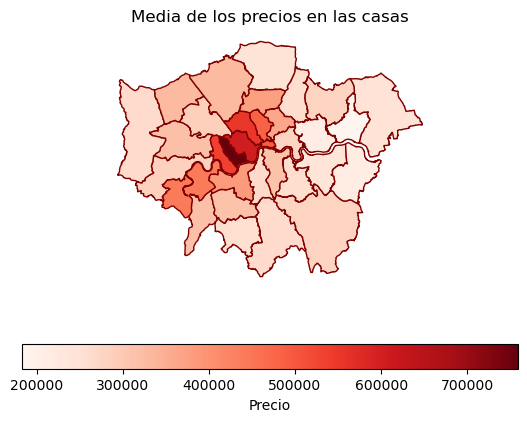

In [83]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = londres_map.plot(column = 'average_price', cmap = 'Reds', edgecolor = 'maroon',
               legend = True, legend_kwds = {'label': 'Precio', 'orientation' : 'horizontal'})
plt.set_title('Media de los precios en las casas')
plt.axis('off')

💸: Recuerden que los precios son mayores en el centro de la cuidad

(500648.735, 564876.965, 153596.645, 203188.055)

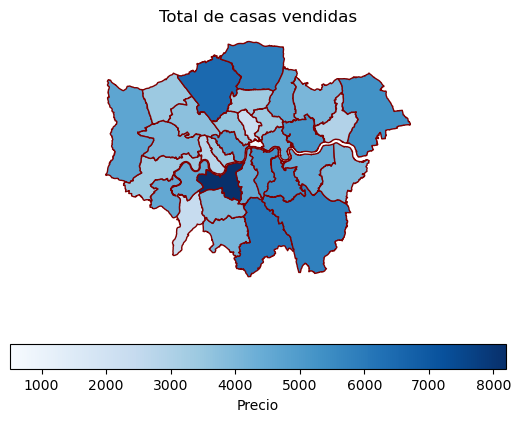

In [85]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)
plt = londres_map.plot(column = 'houses_sold', cmap = 'Blues', edgecolor = 'maroon',
               legend = True, legend_kwds = {'label': 'Precio', 'orientation' : 'horizontal'})
plt.set_title('Total de casas vendidas')
plt.axis('off')

**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

In [115]:
#Filtro de datos
df22 = extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)
df_filt = df22.filter(items=["mean_salary","code"])
df_filt.head()

,mean_salary,code
0,48922,E09000001
1,23620,E09000002
2,23128,E09000003
3,21386,E09000004
4,20911,E09000005


In [137]:
#Unimos  los df
londres_map = pd.merge(londres_map,df_filt,on="code")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold,mean_salary
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00",22967
1,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00",25225
2,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00",27219
3,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00",29702
4,kingston upon thames,E09000021,"3,726.12","POLYGON ((5.16e+05 1.6e+05, 5.16e+05 1.6e+05, ...","318,729.36","2,376.00",32569


(500648.735, 564876.965, 153596.645, 203188.055)

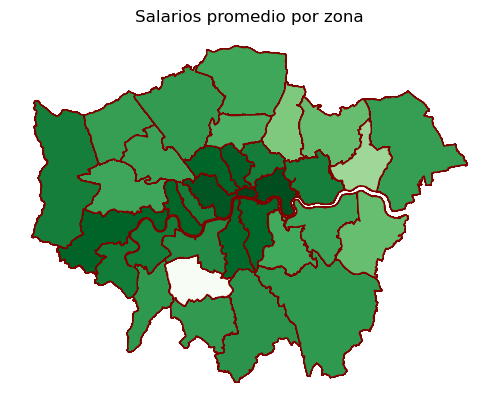

In [157]:
#Graficamos
plt2 = londres_map.plot(column = 'mean_salary', cmap = 'Greens', edgecolor = 'maroon',
               legend = False, legend_kwds = {'label': 'Salario', 'orientation' : 'horizontal'})
plt2.set_title('Salarios promedio por zona')
plt2.axis('off')

***

## <span style="color:green">5. Medir la Correlación </span>


In [173]:
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Crear la matriz de correlación
matriz = df_numerico.corr(method='pearson')

# Comparar correlación
matriz["average_price"].sort_values(ascending=False)

average_price    1.00
median_salary    0.65
index            0.56
borough_flag     0.33
no_of_crimes     0.17
houses_sold     -0.19
Name: average_price, dtype: float64

<Axes: >

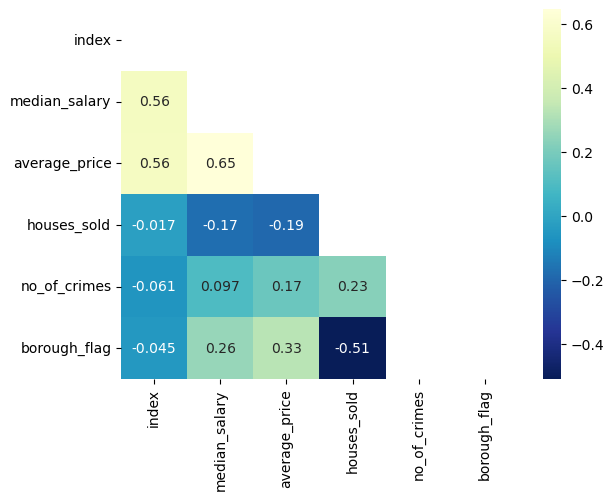

In [177]:
#Importar seaborn 
import seaborn as sns

# Crear vector
mask = np.triu(np.ones_like(matriz, dtype = bool))

# Graficar
plt = sns.heatmap(matriz, mask = mask, annot = True, cmap = 'YlGnBu_r')
plt


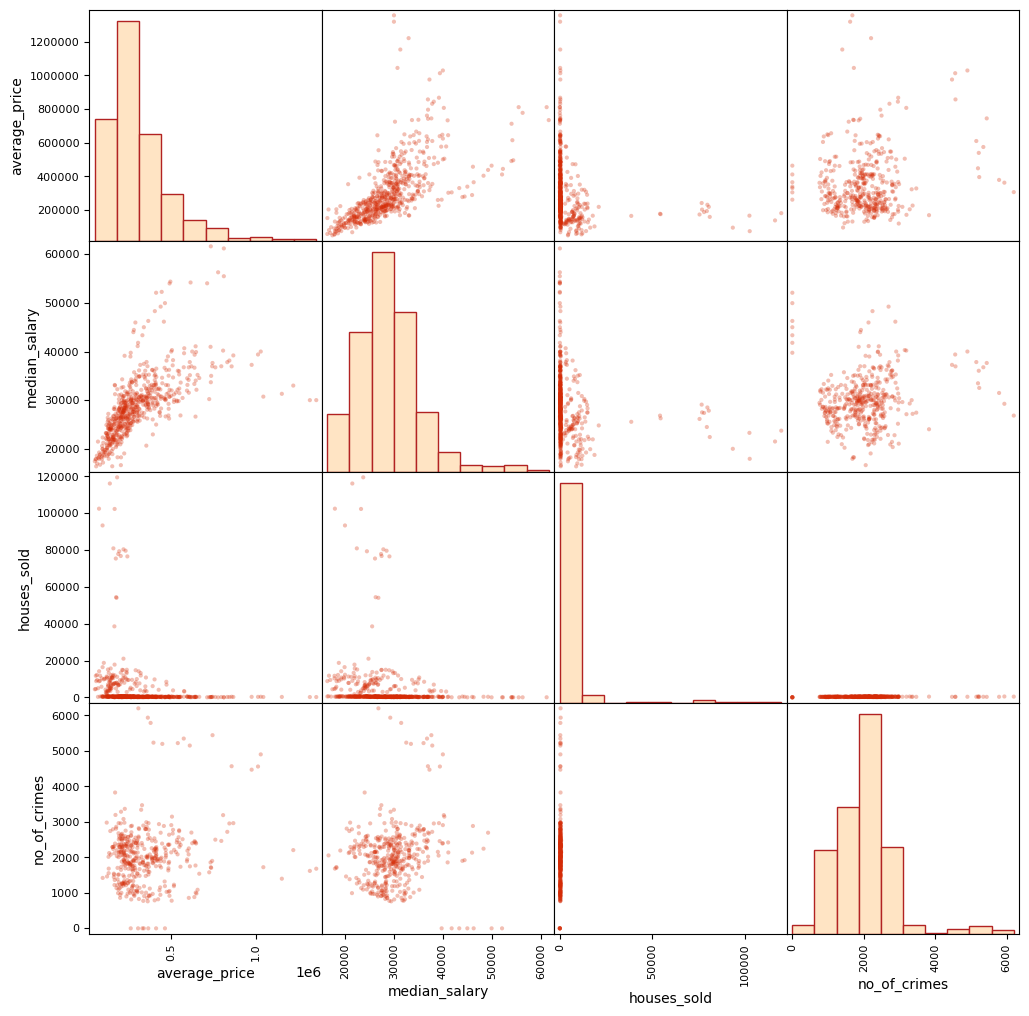

In [187]:
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...
columns = ['average_price', 'median_salary', 'houses_sold', 'no_of_crimes']
scatter_matrix(df_numerico[columns], figsize = (12, 12), color = '#D52B06', alpha = 0.3, 
               hist_kwds = {'color':['bisque'], 'edgecolor': 'firebrick'});


<Axes: xlabel='average_price', ylabel='median_salary'>

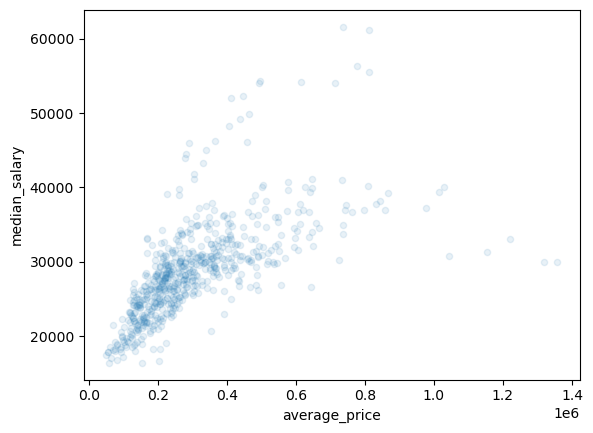

In [189]:
#Por si quieren ver una gráfica en específico más a detalle
df.plot(kind="scatter",y="median_salary",x="average_price",alpha=0.1)

***

## <span style="color:green">6. Combinación de Variables </span>


In [213]:
#Ectraccion de datos
df111=extraer_datos(DOWNLOAD_ROOT,LONDON_SALARY)
df222=extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
#Union
df3=pd.merge(df111,df222)
# Filtrar solo las columnas numéricas
df_numer = df3.select_dtypes(include=['number'])
df_numer.head()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,average_price,houses_sold,no_of_crimes
0,"33,020.00",NaN,"6,581.00",NaN,NaN,NaN,1,169309,97.00,NaN
1,"21,480.00",NaN,"162,444.00",NaN,NaN,NaN,1,68812,267.00,NaN
2,"19,568.00",NaN,"313,469.00",NaN,NaN,NaN,1,149510,619.00,NaN
3,"18,621.00",NaN,"217,458.00",NaN,NaN,NaN,1,93905,460.00,NaN
4,"18,532.00",NaN,"260,317.00",NaN,NaN,NaN,1,123398,395.00,NaN


In [211]:
#Armar una columna para hacer las combinaciones que necesitamos
df_numer["vendidas_poblacion"] = df_numer["population_size"] / df3["houses_sold"]
# Crear matriz de correlación
matriz = df_numer.corr(method='pearson')
matriz["average_price"].sort_values(ascending=False)

average_price         1.00
median_salary         0.64
borough_flag          0.31
vendidas_poblacion    0.26
no_of_crimes          0.19
life_satisfaction     0.09
area_size            -0.15
no_of_houses         -0.15
number_of_jobs       -0.17
population_size      -0.18
houses_sold          -0.19
Name: average_price, dtype: float64

***

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [279]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent['average_price']
#Nuevo dataframe sin average_price
df_label2= cat_set_ent.drop('average_price', axis=1)

***

In [281]:
#Darte una idea de a qué variables le hace faltan datos
df_label2.head()

,index,median_salary,area,date,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,NaN,1,2


In [283]:
#Calcular la suma de todos los vacíos  
espacios_vacios = df_label2.isna().sum().sum() #Doble sum para no tener que sumar individualmente
print('La cantidad de espacios vacios es de:',espacios_vacios)

La cantidad de espacios vacios es de: 220


In [289]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 
df_label3 = df_label2.drop('no_of_crimes', axis=1)
df_label3.head()

,index,median_salary,area,date,code,houses_sold,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,1,2


In [291]:
espacios_vacios = df_label3.isna().sum().sum() #Doble sum para no tener que sumar individualmente
print('La cantidad de espacios vacios es de:',espacios_vacios)

La cantidad de espacios vacios es de: 27


In [297]:
#Tomamos la media 
median = df_label3["houses_sold"].median()
#Llenamos los valores con la media
df_label3['houses_sold'] = df_label3['houses_sold'].fillna(median)  
#Verifica que no hay datos vacíos
espacios_vacios = df_label3.isna().sum().sum() #Doble sum para no tener que sumar individualmente
print('La cantidad de espacios vacios es de:',espacios_vacios)

La cantidad de espacios vacios es de: 0


***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [357]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer
from sklearn.impute import SimpleImputer

# 2. Crear objeto, en este caso se llamará imputer

imputer = SimpleImputer(strategy="median")
df9=pd.merge(df111,df)
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   code               616 non-null    object  
 1   area               616 non-null    object  
 2   date               616 non-null    object  
 3   median_salary      616 non-null    float64 
 4   life_satisfaction  224 non-null    float64 
 5   mean_salary        616 non-null    object  
 6   recycling_pct      572 non-null    object  
 7   population_size    589 non-null    float64 
 8   number_of_jobs     543 non-null    float64 
 9   area_size          458 non-null    float64 
 10  no_of_houses       458 non-null    float64 
 11  borough_flag       616 non-null    int64   
 12  index              616 non-null    int64   
 13  average_price      616 non-null    int64   
 14  houses_sold        589 non-null    float64 
 15  no_of_crimes       423 non-null    float64 
 16  salary_c

In [363]:
# data numérico
df_num = df9.drop(["area","date","code","recycling_pct", "mean_salary", "average_price","median_salary",
                  "number_of_jobs","salary_cat","area_size"],axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   life_satisfaction  224 non-null    float64
 1   population_size    589 non-null    float64
 2   no_of_houses       458 non-null    float64
 3   borough_flag       616 non-null    int64  
 4   index              616 non-null    int64  
 5   houses_sold        589 non-null    float64
 6   no_of_crimes       423 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 33.8 KB


In [379]:
#Ejecuta Imputer
imputer.fit(df_num)

#Aplicar transform para rellenar las medianas 
X = imputer.transform(df_num)
print(X)

[[7.490000e+00 6.581000e+03 1.025085e+05 ... 0.000000e+00 9.700000e+01
  2.011000e+03]
 [7.490000e+00 1.624440e+05 1.025085e+05 ... 1.000000e+00 2.670000e+02
  2.011000e+03]
 [7.490000e+00 3.134690e+05 1.025085e+05 ... 2.000000e+00 6.190000e+02
  2.011000e+03]
 ...
 [7.490000e+00 2.694650e+05 1.025085e+05 ... 8.980000e+02 3.490000e+02
  2.011000e+03]
 [7.490000e+00 2.694650e+05 1.025085e+05 ... 8.990000e+02 3.490000e+02
  2.011000e+03]
 [7.490000e+00 2.694650e+05 1.025085e+05 ... 9.020000e+02 3.490000e+02
  2.011000e+03]]


In [375]:
#Regresarlo a dataframe 
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr.head()

,life_satisfaction,population_size,no_of_houses,borough_flag,index,houses_sold,no_of_crimes
0,7.49,"6,581.00","102,508.50",1.00,0.00,97.00,"2,011.00"
1,7.49,"162,444.00","102,508.50",1.00,1.00,267.00,"2,011.00"
2,7.49,"313,469.00","102,508.50",1.00,2.00,619.00,"2,011.00"
3,7.49,"260,317.00","102,508.50",1.00,4.00,395.00,"2,011.00"
4,7.49,"190,003.00","102,508.50",1.00,6.00,357.00,"2,011.00"


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [383]:
#definir que variable vamos a cambiar a valor numérico
df_cat = df9[["area","date","code","recycling_pct", "mean_salary"]]
df_cat.head()

,area,date,code,recycling_pct,mean_salary
0,city of london,1999-12-01,E09000001,0,48922
1,barking and dagenham,1999-12-01,E09000002,3,23620
2,barnet,1999-12-01,E09000003,8,23128
3,brent,1999-12-01,E09000005,6,20911
4,camden,1999-12-01,E09000007,13,30249


In [389]:
#Convertir variables de texto en numéricas
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df_oe = ordinal_encoder.fit_transform(df_cat)

print(df_oe)

[[  6.   0.   0.   0. 546.]
 [  0.   0.   1.  23.  44.]
 [  1.   0.   2.  52.  39.]
 ...
 [ 34.  20.  38.  nan 463.]
 [ 35.  20.  39.  nan 323.]
 [ 11.  20.  42.  nan 451.]]


In [391]:
#verificar que si se haya transformado
ordinal_encoder.categories_

[array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
        'camden', 'city of london', 'croydon', 'ealing', 'east midlands',
        'enfield', 'england', 'greenwich', 'hackney',
        'hammersmith and fulham', 'haringey', 'harrow', 'havering',
        'hillingdon', 'hounslow', 'inner london', 'islington',
        'kensington and chelsea', 'kingston upon thames', 'lambeth',
        'lewisham', 'london', 'merton', 'newham', 'north east',
        'north west', 'outer london', 'redbridge', 'richmond upon thames',
        'south east', 'south west', 'southwark', 'sutton', 'tower hamlets',
        'waltham forest', 'wandsworth', 'west midlands', 'westminster'],
       dtype=object),
 array(['1999-12-01', '2000-12-01', '2001-12-01', '2002-12-01',
        '2003-12-01', '2004-12-01', '2005-12-01', '2006-12-01',
        '2007-12-01', '2008-12-01', '2009-12-01', '2010-12-01',
        '2011-12-01', '2012-12-01', '2013-12-01', '2014-12-01',
        '2015-12-01', '2016-12-01'

In [ ]:
#Por si quieres ver como funciona el encoder


In [393]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#Crear objeto
encoder = OneHotEncoder()
#Ajustar
df_1hot = encoder.fit_transform(df_cat)
df_1hot

<616x773 sparse matrix of type '<class 'numpy.float64'>'
	with 3080 stored elements in Compressed Sparse Row format>

In [395]:
#obligar a que nos muestre la matriz 
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [527]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto 
scaler = MinMaxScaler()
#Hacer un dataframe con la transformación
prueba = pd.DataFrame({'col1':[100,200,300,999],'col2':[0,0,1,2],'col3':[-10,0,1,2]})
prueba

,col1,col2,col3
0,100,0,-10
1,200,0,0
2,300,1,1
3,999,2,2


In [417]:
prueba1=pd.DataFrame(scaler.fit_transform(prueba),columns=prueba.columns)
prueba1

,col1,col2,col3
0,0.00,0.00,0.00
1,0.11,0.00,0.83
2,0.22,0.50,0.92
3,1.00,1.00,1.00


#### <span style="color:Blue">9.2 Estandarización </span>

In [409]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 
from sklearn.preprocessing import StandardScaler
#Crea objeto
scaler1 = StandardScaler()
#Hacer un dataframe con la transformación
prueba2=pd.DataFrame(scaler1.fit_transform(prueba),columns=prueba.columns)
prueba2

,col1,col2,col3
0,-0.85,-0.90,-1.71
1,-0.57,-0.90,0.36
2,-0.28,0.30,0.57
3,1.70,1.51,0.78


***

## <span style="color:Blue">10. Pipeline </span>


In [543]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoverOutliers(BaseEstimator,TransformerMixin):
    def __init__(self,factor=3):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X

remover = RemoverOutliers()
remover.fit(prueba)
remover.transform(prueba)
remover.fit_transform(prueba)

,col1,col2,col3
0,100,0,-10
1,200,0,0
2,300,1,1
3,999,2,2


In [551]:
# Crear función de pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([("remover",RemoverOutliers()),
                      ("rellenar",SimpleImputer(strategy="median")),
                       ("escalar",StandardScaler())])
resultado=pd.DataFrame(pipeline.fit_transform(prueba))
resultado

,0,1,2
0,-0.85,-0.90,-1.71
1,-0.57,-0.90,0.36
2,-0.28,0.30,0.57
3,1.70,1.51,0.78


In [864]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)
from sklearn.compose import ColumnTransformer
df_num2=df9.drop(["area","date","code","recycling_pct", "mean_salary", "average_price","median_salary",
                  "number_of_jobs","salary_cat","area_size","borough_flag","index"],axis=1)
num = list(df_num2)
cat = ["area"]


In [846]:
df_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   life_satisfaction  224 non-null    float64
 1   population_size    589 non-null    float64
 2   no_of_houses       458 non-null    float64
 3   borough_flag       616 non-null    int64  
 4   index              616 non-null    int64  
 5   houses_sold        589 non-null    float64
 6   no_of_crimes       423 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 33.8 KB


In [866]:
#Hacer un datframe que usaremos para la regresión lineal
pipeline_completo = ColumnTransformer([
    ("num", pipeline, num),
    ("cat", OneHotEncoder(), cat)
])

#Visualiza los datos 
df_preparado = pipeline_completo.fit_transform(df9)
df_preparado

<616x48 sparse matrix of type '<class 'numpy.float64'>'
	with 3696 stored elements in Compressed Sparse Row format>

***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [946]:
## Hacer Regresión Lineal (AL FIN)
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
reg_lin.fit(df_preparado, df_label)

algunos_datos = df9.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_transformados = pipeline_completo.transform(algunos_datos)

print("Predicción:",reg_lin.predict(datos_transformados))
print("Originales:",list(datos_predecir))


Predicción: [209336.70060533 250266.56978794 307895.11278604 304129.12537697
 244433.97544886]
Originales: [151841, 279575, 223743, 223141, 262106]


In [904]:
#Análisis preambultario de los errores

***

#### <span style="color:purple">11.1 RMSE </span>

In [948]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
from sklearn.metrics import mean_squared_error
prediccion = reg_lin.predict(df_preparado)

In [950]:
#Sacar el promedio 
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

176325.32558769148

In [952]:
#Calcular el porcentaje de acierto
from sklearn.metrics import r2_score

r2 = r2_score(df_label, prediccion)
porcentaje_acierto = r2 * 100
print(f"Porcentaje de acierto: {porcentaje_acierto}%")

Porcentaje de acierto: 6.610631397981647%


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [954]:
# importar DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#crear objeto 
reg_arbol = DecisionTreeRegressor()
#correrlo
reg_arbol.fit(df_preparado,df_label)
prediccion = reg_arbol.predict(df_preparado)
#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

71553.09084684601

***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [956]:
#Importar cross_val_score, creo objeto, corro mi función
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol, df_preparado, df_label, scoring="neg_mean_squared_error",cv = 10)

In [958]:
#Calcular el porcentaje de acierto de validación cruzada 
rmse = np.sqrt(-resultados)
rmse

array([262974.20056672, 286580.20594893, 214774.63758083, 266673.93061387,
       276304.39208589, 211013.01929219, 244078.2880266 , 272313.63745397,
       226045.90112436, 233196.57630984])

In [960]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(reg_arbol, df_preparado, df_label, scoring="r2", cv=10)
r2_scores.mean()

-0.8849685385730396

***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [962]:
#Importar RandomForestRegressor, creo objeto, corro mi función
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor()
reg_forest.fit(df_preparado,df_label)
prediccion = reg_forest.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

96757.00324871992

In [964]:
#Calcular el el promedio de la suma de los errores al cuadrado
resultados = cross_val_score(reg_forest, df_preparado, df_label, scoring="neg_mean_squared_error",cv = 10)
rmse = np.sqrt(-resultados)
rmse

array([218425.53039437, 183577.16971468, 179055.16662518, 219755.44323886,
       205450.15633677, 190309.53547936, 178513.68108162, 199822.63965572,
       198203.27959417, 167363.44095763])

In [966]:
#Calcular el porcentaje de acierto de bosque aleatorio
from sklearn.metrics import r2_score

r2 = r2_score(df_label, prediccion)
porcentaje_acierto = r2 * 100 #en %
print(f"Porcentaje de acierto: {porcentaje_acierto}%")


Porcentaje de acierto: 71.8788635174452%


***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [968]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV

### <span style="color:purple">12.2 set de prueba</span>

In [974]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 
param_grid = [{
    'n_estimators': [3,10,30], 'max_features': [2,4,6,8]
}]
#Aquí definimos cuál será nuestra variable a predecir y las predichas 

grid_search = GridSearchCV(reg_forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

#Ahora, sí. El pipeline para limpieza de datos 

grid_search.fit(df_preparado,df_label)

#Por último, ver el error del modelo 
mejor_score_neg_mse = grid_search.best_score_  # Esto es negativo
mejor_rmse = np.sqrt(-mejor_score_neg_mse)
print("Mejor RMSE en validación cruzada:", mejor_rmse)
mejores_parametros = grid_search.best_params_
print("Mejores parámetros:", mejores_parametros)

Mejor RMSE en validación cruzada: 196190.13874055017
Mejores parámetros: {'max_features': 8, 'n_estimators': 30}


In [992]:
#Ver el porcentaje de acierto
modelo_final = grid_search.best_estimator_
print(modelo_final)

RandomForestRegressor(max_features=8, n_estimators=30)
